# Preprocessing Data

In [8]:
data_url = r'..\..\Datasets\advertising_and_sales_clean.csv'

In [22]:
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')

In [10]:
sales_df = pd.read_csv(data_url)
print(sales_df.shape)
sales_df.head()

(4546, 5)


,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [12]:
sales_df['influencer'].unique()

array(['Mega', 'Micro', 'Nano', 'Macro'], dtype=object)

### Ecoding Dummy Variables

In [17]:
sales_dummies = pd.get_dummies(sales_df['influencer'])
sales_dummies.head()

,Macro,Mega,Micro,Nano
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,False,True,False


In [18]:
sales_dummies = pd.get_dummies(sales_df['influencer'], drop_first=True)
sales_dummies.head()

,Mega,Micro,Nano
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,True,False


In [19]:
sales_dummies = pd.get_dummies(sales_df, drop_first=True)
sales_dummies.head()

,tv,radio,social_media,sales,influencer_Mega,influencer_Micro,influencer_Nano
0,16000.0,6566.23,2907.98,54732.76,True,False,False
1,13000.0,9237.76,2409.57,46677.90,True,False,False
2,41000.0,15886.45,2913.41,150177.83,True,False,False
3,83000.0,30020.03,6922.30,298246.34,True,False,False
4,15000.0,8437.41,1406.00,56594.18,False,True,False


### Linear Regression with Dummy Variables

In [7]:
import sklearn.model_selection as skms
import sklearn.linear_model as sklm

In [25]:
X = sales_dummies.drop('sales', axis=1).values
y = sales_dummies['sales'].values
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.2, random_state=42)
kf = skms.KFold(n_splits=5, shuffle=True, random_state=42)
lr = sklm.LinearRegression()
lr_cv = skms.cross_val_score(lr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
rmse = np.sqrt(-lr_cv)
print(rmse)

[2991.71318749 3027.19693854 3020.25424776 2879.32746942 2932.20036979]


#### If average <B>RMSE</B> of model is lower than <B>Standard Deviation</B> of the target variable; it suggests that the model is <B>Resonably Accurate</B>

In [29]:
print(f"Average RMSE: {np.mean(rmse):.2f}")
print(f"Standard Deviation of the target array (Train): {np.std(y_train):.2f}")
print(f"Standard Deviation of the target array (Test): {np.std(y_test):.2f}")

Average RMSE: 2970.14
Standard Deviation of the target array (Train): 93330.25
Standard Deviation of the target array (Test): 91708.27


In [32]:
pip install bs4

   ---------------------------------------- 0.0/147.9 kB ? eta -:--:--
   ---------------------------------------- 147.9/147.9 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install lxml

   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   - -------------------------------------- 0.1/3.9 MB 3.6 MB/s eta 0:00:02
   ---- ----------------------------------- 0.5/3.9 MB 5.9 MB/s eta 0:00:01
   ---------- ----------------------------- 1.0/3.9 MB 7.9 MB/s eta 0:00:01
   --------------- ------------------------ 1.5/3.9 MB 8.8 MB/s eta 0:00:01
   --------------------- ------------------ 2.1/3.9 MB 10.1 MB/s eta 0:00:01
   -------------------------- ------------- 2.5/3.9 MB 10.1 MB/s eta 0:00:01
   ------------------------------- -------- 3.1/3.9 MB 10.3 MB/s eta 0:00:01
   ------------------------------------ --- 3.6/3.9 MB 10.3 MB/s eta 0:00:01
   ---------------------------------------- 3.9/3.9 MB 10.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [57]:
import requests
import pandas as pd
import bs4

In [58]:
url = r'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'
table_class="wikitable sortable mw-datatable sticky-header static-row-numbers sort-under col1left col2left col3left jquery-tablesorter"

In [59]:
response = requests.get(url)
print(response.status_code)

200


In [60]:
soup = bs4.BeautifulSoup(response.text, 'html.parser')
tbl = soup.find('table', {'class':'wikitable'})

In [37]:
tbl

<table class="wikitable sortable mw-datatable sticky-header static-row-numbers sort-under col1left col2left col3left" style="text-align:right">
<caption>List of countries and inhabited territories by total population. United Nations
</caption>
<tbody><tr>
<th>Location
</th>
<th style="max-width:9em;"><a href="/wiki/United_Nations_geoscheme" title="United Nations geoscheme">UN Continental Region</a><sup class="reference" id="cite_ref-region_6-0"><a href="#cite_note-region-6">[6]</a></sup>
</th>
<th style="max-width:8em;"><a class="mw-redirect" href="/wiki/List_of_countries_by_the_United_Nations_geoscheme" title="List of countries by the United Nations geoscheme">UN Statistical Subregion</a><sup class="reference" id="cite_ref-region_6-1"><a href="#cite_note-region-6">[6]</a></sup>
</th>
<th>Population<br/>(1 July 2022)
</th>
<th>Population<br/>(1 July 2023)
</th>
<th>Change
</th></tr>
<tr class="static-row-numbers-norank">
<td><b><span class="flagicon" style="padding-left:25px;"> </span>

In [61]:
wiki_df = pd.read_html(str(tbl))
wiki_df = pd.DataFrame(wiki_df[0])

In [62]:
print(wiki_df.shape)
wiki_df.head()

(239, 6)


,Location,UN Continental Region[6],UN Statistical Subregion[6],Population (1 July 2022),Population (1 July 2023),Change
0,World,NaN,NaN,7.975105e+09,8.045311e+09,+0.88%
1,India,Asia,Southern Asia,1.417173e+09,1.428628e+09,+0.81%
2,China[a],Asia,Eastern Asia,1.425887e+09,1.425671e+09,−0.02%
3,United States,Americas,Northern America,3.382899e+08,3.399966e+08,+0.50%
4,Indonesia,Asia,South-eastern Asia,2.755013e+08,2.775341e+08,+0.74%


In [63]:
wiki_df = pd.melt(
  wiki_df
  , id_vars=['Location', 'UN Continental Region[6]', 'UN Statistical Subregion[6]', 'Change']
  , value_vars=['Population (1 July 2022)', 'Population (1 July 2023)']
  , var_name='Date'
  , value_name='Population'
)

In [64]:
wiki_df.head()

,Location,UN Continental Region[6],UN Statistical Subregion[6],Change,Date,Population
0,World,NaN,NaN,+0.88%,Population (1 July 2022),7.975105e+09
1,India,Asia,Southern Asia,+0.81%,Population (1 July 2022),1.417173e+09
2,China[a],Asia,Eastern Asia,−0.02%,Population (1 July 2022),1.425887e+09
3,United States,Americas,Northern America,+0.50%,Population (1 July 2022),3.382899e+08
4,Indonesia,Asia,South-eastern Asia,+0.74%,Population (1 July 2022),2.755013e+08


In [65]:
wiki_df['Date'] = wiki_df['Date'].str.replace('Population (', '').str.replace(')','')
wiki_df['Date'] = pd.to_datetime(wiki_df['Date'])
wiki_df.columns = [
    'Country'
    , 'Continent'
    , 'Region'
    , r'Change_%age'
    , 'Date'
    , 'Population'
]
wiki_df.head()

,Country,Continent,Region,Change_%age,Date,Population
0,World,NaN,NaN,+0.88%,2022-07-01,7.975105e+09
1,India,Asia,Southern Asia,+0.81%,2022-07-01,1.417173e+09
2,China[a],Asia,Eastern Asia,−0.02%,2022-07-01,1.425887e+09
3,United States,Americas,Northern America,+0.50%,2022-07-01,3.382899e+08
4,Indonesia,Asia,South-eastern Asia,+0.74%,2022-07-01,2.755013e+08


In [69]:
df = wiki_df.groupby([
    'Country'
    , 'Date'])['Population']\
    .sum().reset_index()
df = df.pivot(
    index = 'Country'
    , columns = 'Date'
    , values = 'Population'
)
df['Change'] = df['7/1/2023']-df['7/1/2022']
df.columns = ['Jul-2022', 'Jul-2023', 'Change']
df['Change_%age'] = df['Change'] / df['Jul-2023']
df.sort_values(by='Change_%age', ascending=False, inplace=True)
df.head()

,Jul-2022,Jul-2023,Change,Change_%age
Country,,,,
Syria,22125249.0,23227014.0,1101765.0,0.047435
Moldova[q],3272996.0,3435931.0,162935.0,0.047421
Niger,26207977.0,27202843.0,994866.0,0.036572
DR Congo,99010212.0,102262809.0,3252597.0,0.031806
Chad,17723315.0,18278568.0,555253.0,0.030377


In [78]:
df1 = df.iloc[:20, :]

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

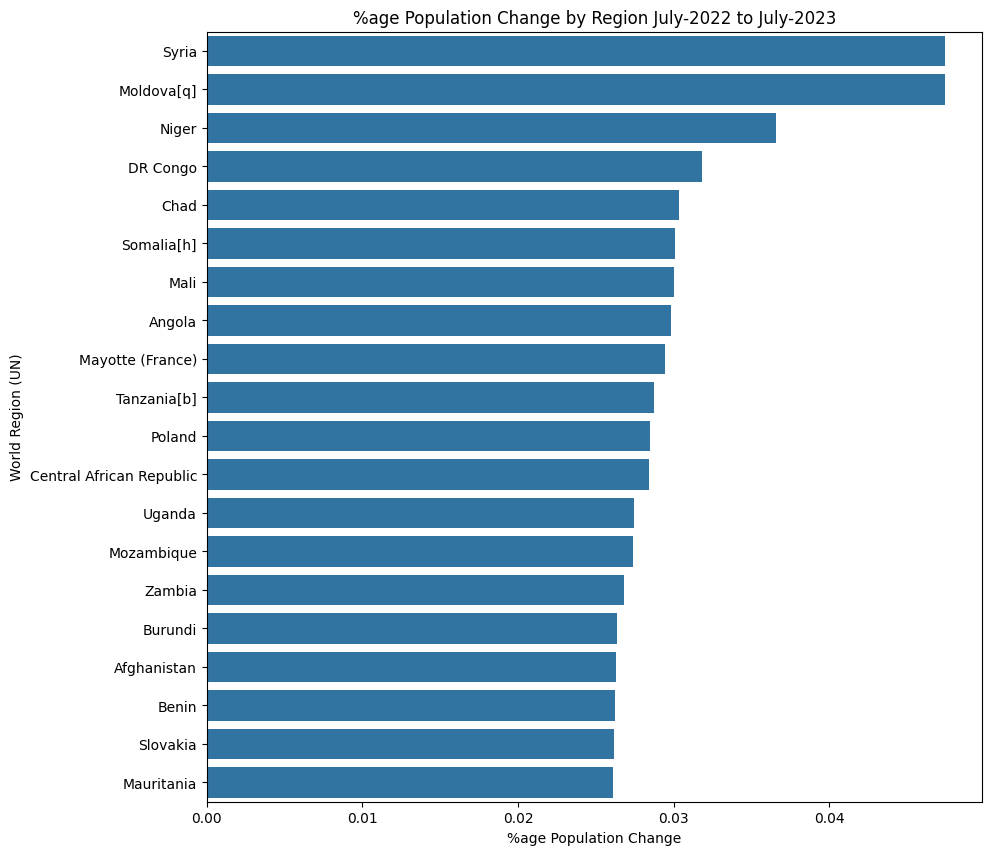

In [79]:
plt.figure(figsize=(10,10))
sns.barplot(
    data = df1
    , x = 'Change_%age'
    , y = df1.index
)
plt.title('%age Population Change by Region July-2022 to July-2023')
plt.xlabel('%age Population Change')
plt.ylabel('World Region (UN)')
plt.show;